In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/Crédito Carbono Futuros Dados Históricos.csv")

In [3]:
df["Data"] = pd.to_datetime(df["Data"].values, errors="ignore")

/tmp/ipykernel_10708/1558440062.py:1: UserWarning: Parsing '25.04.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Data"] = pd.to_datetime(df["Data"].values, errors="ignore")
/tmp/ipykernel_10708/1558440062.py:1: UserWarning: Parsing '24.04.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Data"] = pd.to_datetime(df["Data"].values, errors="ignore")
/tmp/ipykernel_10708/1558440062.py:1: UserWarning: Parsing '21.04.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Data"] = pd.to_datetime(df["Data"].values, errors="ignore")
/tmp/ipykernel_10708/1558440062.py:1: UserWarning: Parsing '20.04.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Data"] = pd.to_datetime(df["Data"].values, errors="ignore")
/tmp/ipykernel_10708/1558440062.py:1: UserWarning: P

In [4]:
df["Último"] = df["Último"].str.replace(",", ".").astype("float")

In [5]:
df = df[["Data", "Último"]].set_index("Data")

In [6]:
df

,Último
Data,
2023-04-25,86.81
2023-04-24,88.56
2023-04-21,89.86
2023-04-20,91.74
2023-04-19,94.39
...,...
2013-08-01,6.27
2013-07-01,6.46
2013-04-01,6.14


In [7]:
df_m = df.groupby(pd.Grouper(freq="M")).mean()

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [9]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

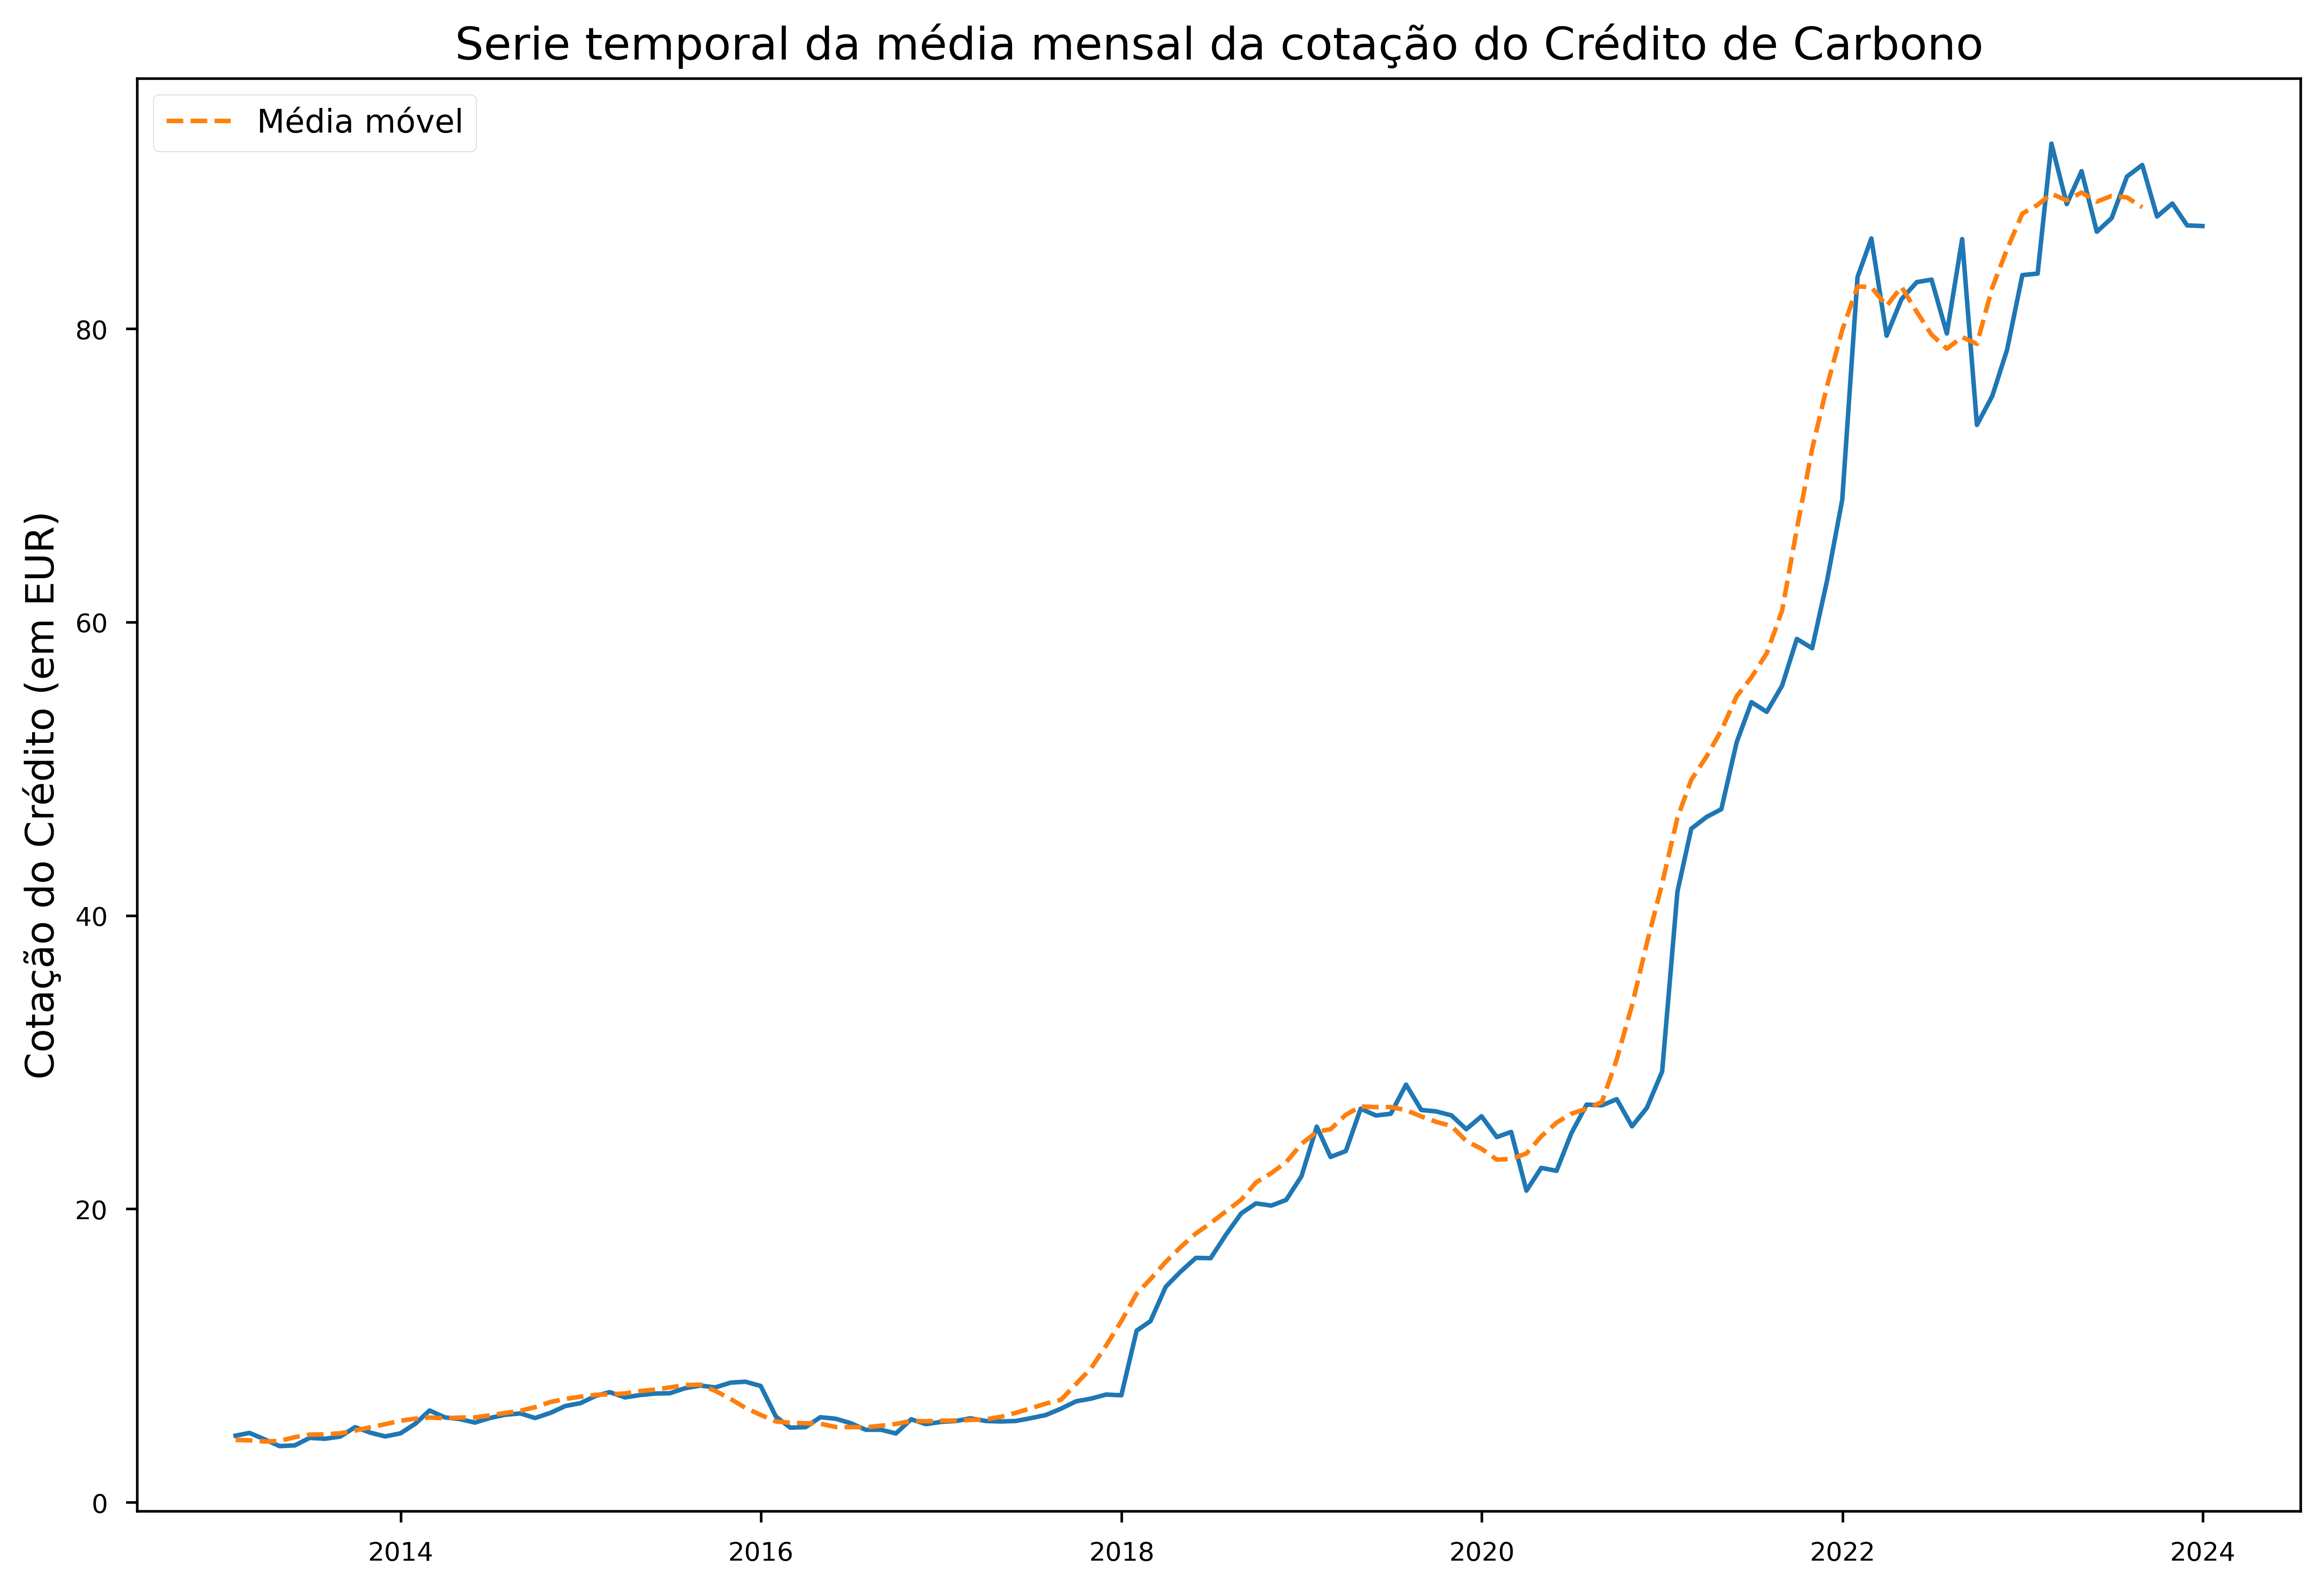

In [10]:
plt.style.use("seaborn-v0_8-paper")

#some confidence interval
# ci = 1.96 * np.std(df_m["Último"])/np.sqrt(len(df_m.index))

fig, ax = plt.subplots(figsize=(12,8), dpi=500)
ax.plot(df_m["Último"])
plt.plot(df_m.index[:-4], moving_average(df_m["Último"], 5), "--", label = "Média móvel")
ax.set_ylabel('Cotação do Crédito (em EUR)', fontsize=12)
ax.set_title('Serie temporal da média mensal da cotação do Crédito de Carbono', color="black", fontsize=14)
ax.legend(labelcolor="black", fontsize=10, loc="upper left")

# ax.fill_between(df_m.index, (df_m["Último"]-ci), (df_m["Último"]+ci), color='b', alpha=.1)

plt.show()

In [11]:
fig.savefig("./figs/fig1.svg")

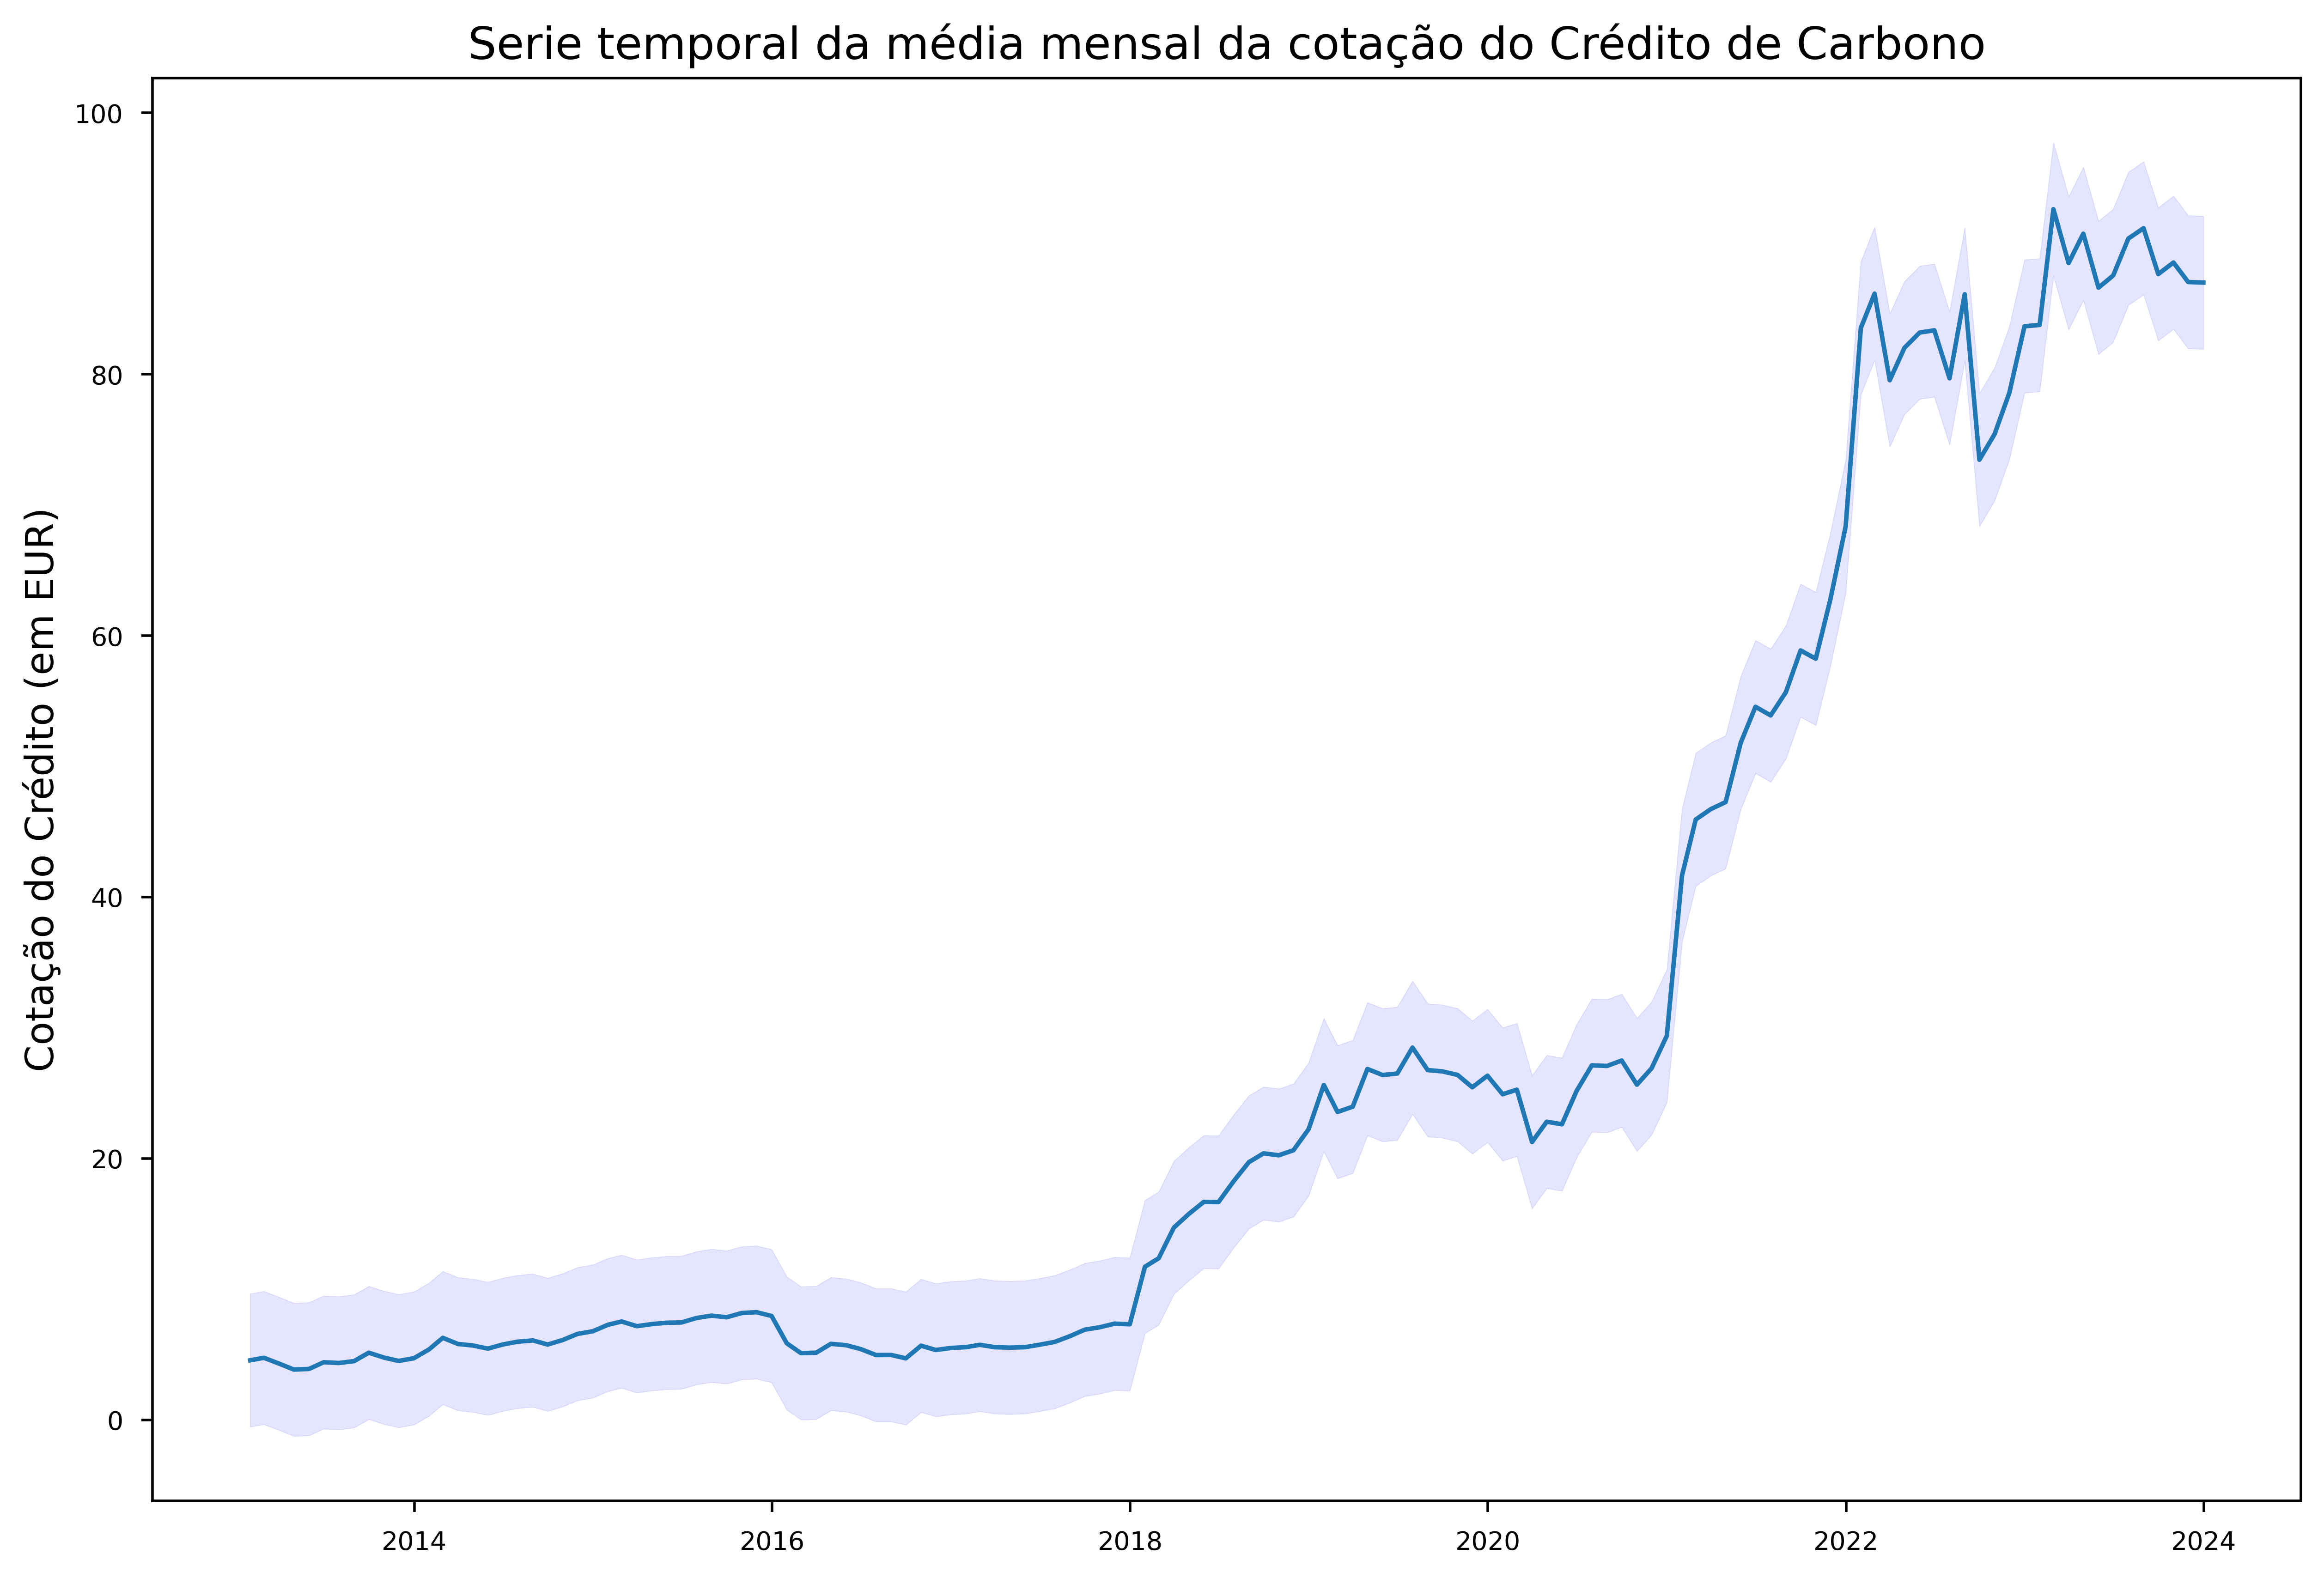

In [12]:
plt.style.use("seaborn-v0_8-paper")

#some confidence interval
ci = 1.96 * np.std(df_m["Último"])/np.sqrt(len(df_m.index))

fig, ax = plt.subplots(figsize=(12,8), dpi=500)
ax.plot(df_m["Último"])
# plt.plot(df_m.index[:-4], moving_average(df_m["Último"], 5), "--", label = "Média móvel")
ax.set_ylabel('Cotação do Crédito (em EUR)', fontsize=12)
ax.set_title('Serie temporal da média mensal da cotação do Crédito de Carbono', color="black", fontsize=14)
# ax.legend(labelcolor="black", fontsize=10, loc="upper left")

ax.fill_between(df_m.index, (df_m["Último"]-ci), (df_m["Último"]+ci), color='b', alpha=.1)

plt.show()

In [13]:
fig.savefig("./figs/fig2.svg")